<h1>Requests Data Preprocessing</h1>

In [183]:
%cd F:\University\Master's Thesis\Datasets\rnd

F:\University\Master's Thesis\Datasets\rnd


In [184]:
import pandas as pd

# Read the CSV file
df = pd.read_excel('CPU & Memory Data.xlsx', sheet_name='Requests')

# Convert 'Time' to datetime
df['Time'] = pd.to_datetime(df['Time'])


df.head()

,Time,exported_service,host,instance,method,namespace,path,status,Value,service_method_status
0,2024-04-19 22:06:00,order-management-srv,microservices-bookstore.dev,10.1.10.31:10254,GET,ingress-nginx,/api/orders/.*,200,5,order-management-srv_GET_200
1,2024-04-19 22:07:00,order-management-srv,microservices-bookstore.dev,10.1.10.31:10254,GET,ingress-nginx,/api/orders/.*,200,5,order-management-srv_GET_200
2,2024-04-19 22:08:00,order-management-srv,microservices-bookstore.dev,10.1.10.31:10254,GET,ingress-nginx,/api/orders/.*,200,5,order-management-srv_GET_200
3,2024-04-19 22:09:00,order-management-srv,microservices-bookstore.dev,10.1.10.31:10254,GET,ingress-nginx,/api/orders/.*,200,5,order-management-srv_GET_200
4,2024-04-19 22:10:00,order-management-srv,microservices-bookstore.dev,10.1.10.31:10254,GET,ingress-nginx,/api/orders/.*,200,5,order-management-srv_GET_200


In [185]:
# Define the list of status codes to remove
status_to_remove = [401, 404, 499, 200, 201]

# Filter the DataFrame to exclude records with the specified status codes
df = df[~df['status'].isin(status_to_remove)]

df.head(-1)

,Time,exported_service,host,instance,method,namespace,path,status,Value,service_method_status
41,2024-04-19 22:23:00,order-management-srv,microservices-bookstore.dev,10.1.10.31:10254,POST,ingress-nginx,/api/orders/.*,502,1,order-management-srv_POST_502
42,2024-04-19 22:24:00,order-management-srv,microservices-bookstore.dev,10.1.10.31:10254,POST,ingress-nginx,/api/orders/.*,502,10,order-management-srv_POST_502
43,2024-04-19 22:25:00,order-management-srv,microservices-bookstore.dev,10.1.10.31:10254,POST,ingress-nginx,/api/orders/.*,502,21,order-management-srv_POST_502
44,2024-04-19 22:26:00,order-management-srv,microservices-bookstore.dev,10.1.10.31:10254,POST,ingress-nginx,/api/orders/.*,502,24,order-management-srv_POST_502
45,2024-04-19 22:27:00,order-management-srv,microservices-bookstore.dev,10.1.10.31:10254,POST,ingress-nginx,/api/orders/.*,502,24,order-management-srv_POST_502
...,...,...,...,...,...,...,...,...,...,...
102729,2024-04-23 16:52:00,user-account-srv,microservices-bookstore.dev,10.1.12.84:10254,POST,ingress-nginx,/api/users/.*,502,1,user-account-srv_POST_502
102730,2024-04-23 16:53:00,user-account-srv,microservices-bookstore.dev,10.1.12.84:10254,POST,ingress-nginx,/api/users/.*,502,1,user-account-srv_POST_502
102731,2024-04-23 16:54:00,user-account-srv,microservices-bookstore.dev,10.1.12.84:10254,POST,ingress-nginx,/api/users/.*,502,1,user-account-srv_POST_502
102732,2024-04-23 16:55:00,user-account-srv,microservices-bookstore.dev,10.1.12.84:10254,POST,ingress-nginx,/api/users/.*,502,1,user-account-srv_POST_502


In [186]:
# Convert 'status' to string
df['status'] = df['status'].astype(str)

# Concatenate 'exported_service' and 'method'
# df['service_method_status'] = df['exported_service'] + '_' + df['method'] + '_' + df['status']

# Group by 'service_method' and 'Time', count occurrences
grouped_df = df.groupby(['service_method_status', pd.Grouper(key='Time', freq='1Min')]).size().reset_index(name='count')

# Pivot the DataFrame to have 'Time' as index and 'service_method' as columns
pivoted_df = grouped_df.pivot(index='Time', columns='service_method_status', values='count').fillna(0)

pivoted_df.head(-1)
pivoted_df.to_csv('Pivoted Requests Data.csv')

In [187]:
pivoted_data = pd.read_csv("Pivoted Requests Data.csv")
pivoted_data['Time'] = pd.to_datetime(pivoted_data['Time'])
# Set 'Time' as the index
pivoted_data.set_index('Time', inplace=True)

# Generate a DataFrame with complete timestamps
min_time = pivoted_data.index.min()
max_time = pivoted_data.index.max()
complete_time_index = pd.date_range(min_time, max_time, freq='1Min')

# Merge with the original DataFrame to fill in missing rows
complete_df = pd.DataFrame(index=complete_time_index)
complete_df = complete_df.merge(pivoted_data, how='left', left_index=True, right_index=True)

# Replace missing values with 0
complete_df = complete_df.fillna(0)
complete_df.head(-1)

,order-management-srv_GET_500,order-management-srv_GET_502,order-management-srv_GET_503,order-management-srv_GET_504,order-management-srv_POST_500,order-management-srv_POST_502,order-management-srv_POST_503,order-management-srv_POST_504,order-management-srv_PUT_500,order-management-srv_PUT_502,...,review-and-rating-srv_POST_504,review-and-rating-srv_PUT_500,review-and-rating-srv_PUT_502,review-and-rating-srv_PUT_503,review-and-rating-srv_PUT_504,shipping-and-logistics-srv_GET_500,shipping-and-logistics-srv_GET_502,user-account-srv_GET_502,user-account-srv_POST_500,user-account-srv_POST_502
2024-04-19 16:20:00,0.0,1.0,0.0,1.0,0.0,1.0,0.0,1.0,0.0,1.0,...,1.0,0.0,1.0,0.0,0.0,0.0,1.0,1.0,0.0,1.0
2024-04-19 16:21:00,0.0,1.0,0.0,1.0,0.0,1.0,0.0,1.0,0.0,1.0,...,1.0,0.0,1.0,0.0,1.0,0.0,1.0,1.0,0.0,1.0
2024-04-19 16:22:00,0.0,1.0,0.0,1.0,0.0,1.0,0.0,1.0,0.0,1.0,...,1.0,0.0,1.0,0.0,1.0,0.0,1.0,1.0,0.0,1.0
2024-04-19 16:23:00,0.0,1.0,0.0,1.0,0.0,1.0,0.0,1.0,0.0,1.0,...,1.0,0.0,1.0,0.0,1.0,0.0,1.0,1.0,0.0,1.0
2024-04-19 16:24:00,0.0,1.0,0.0,1.0,0.0,1.0,0.0,1.0,0.0,1.0,...,1.0,0.0,1.0,0.0,1.0,0.0,1.0,1.0,0.0,1.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2024-04-23 16:52:00,0.0,1.0,1.0,1.0,0.0,1.0,0.0,1.0,0.0,1.0,...,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0
2024-04-23 16:53:00,0.0,1.0,1.0,1.0,0.0,1.0,0.0,1.0,0.0,1.0,...,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0
2024-04-23 16:54:00,0.0,1.0,1.0,1.0,0.0,1.0,0.0,1.0,0.0,1.0,...,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0
2024-04-23 16:55:00,0.0,1.0,1.0,1.0,0.0,1.0,0.0,1.0,0.0,1.0,...,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0


In [188]:
# Check for missing values
missing_values = complete_df.isna().sum()

# Display the count of missing values for each column
print("Missing values in the DataFrame:")
print(missing_values)

# Check if any missing values exist
if missing_values.sum() == 0:
    print("No missing values found in the DataFrame.")
else:
    print("Missing values exist in the DataFrame.")

Missing values in the DataFrame:
order-management-srv_GET_500          0
order-management-srv_GET_502          0
order-management-srv_GET_503          0
order-management-srv_GET_504          0
order-management-srv_POST_500         0
order-management-srv_POST_502         0
order-management-srv_POST_503         0
order-management-srv_POST_504         0
order-management-srv_PUT_500          0
order-management-srv_PUT_502          0
order-management-srv_PUT_503          0
order-management-srv_PUT_504          0
payment-processing-srv_GET_500        0
payment-processing-srv_GET_502        0
payment-processing-srv_PUT_500        0
payment-processing-srv_PUT_502        0
product-catalog-srv_GET_500           0
product-catalog-srv_GET_502           0
product-catalog-srv_GET_504           0
product-catalog-srv_POST_500          0
product-catalog-srv_POST_502          0
product-catalog-srv_POST_504          0
product-catalog-srv_PUT_500           0
product-catalog-srv_PUT_502           0
product

In [189]:

# Generate new time index extending three times into the future
min_time = complete_df.index.min()
max_time = complete_df.index.max() + pd.Timedelta(minutes=(len(complete_df)) * 5)  # Extend time range by three times
extended_time_index = pd.date_range(min_time, max_time, freq='1Min')
# Create a new DataFrame with the extended time index
extended_df = pd.DataFrame(index=extended_time_index)

# Iterate over each column in 'complete_df'
for column in complete_df.columns:
    # Replicate the values of the current column to fill the extended time range
    extended_df[column] = np.tile(complete_df[column].values, 6)  # Change the replication factor as needed

extended_df['Time'] = extended_df.index
extended_df.to_csv('Pivoted Requests Data.csv')

<h1>Resource Utilization Data Preprocessing</h1>

In [144]:
import pandas as pd
import matplotlib.pyplot as plt
from scipy.interpolate import interp1d

# Read the CSV file
df = pd.read_excel('CPU & Memory Data.xlsx', sheet_name='CPU & Memory Data')

# Convert 'Time' to datetime
df['Time'] = pd.to_datetime(df['Time'])

# Set 'Time' as the index
df.set_index('Time', inplace=True)
# Generate a DataFrame with complete timestamps
min_time = df.index.min()
max_time = df.index.max()
complete_time_index = pd.date_range(min_time, max_time, freq='1Min')

# Merge with the original DataFrame to fill in missing rows
complete_df = pd.DataFrame(index=complete_time_index)
complete_df = complete_df.merge(df, how='left', left_index=True, right_index=True)

complete_df = complete_df.interpolate(method='spline', order=5)

complete_df['Time'] = complete_df.index

complete_df.head(-1)

,CPU,Memory,Time
2024-04-19 16:22:00,0.980,0.898,2024-04-19 16:22:00
2024-04-19 16:23:00,0.885,0.571,2024-04-19 16:23:00
2024-04-19 16:24:00,0.740,0.706,2024-04-19 16:24:00
2024-04-19 16:25:00,0.609,0.771,2024-04-19 16:25:00
2024-04-19 16:26:00,0.447,0.809,2024-04-19 16:26:00
...,...,...,...
2024-04-23 18:25:00,0.276,0.821,2024-04-23 18:25:00
2024-04-23 18:26:00,0.276,0.819,2024-04-23 18:26:00
2024-04-23 18:27:00,0.281,0.832,2024-04-23 18:27:00
2024-04-23 18:28:00,0.284,0.819,2024-04-23 18:28:00


In [102]:
# Check for missing values
missing_values = complete_df.isna().sum()

# Display the count of missing values for each column
print("Missing values in the DataFrame:")
print(missing_values)

# Check if any missing values exist
if missing_values.sum() == 0:
    print("No missing values found in the DataFrame.")
else:
    print("Missing values exist in the DataFrame.")

Missing values in the DataFrame:
CPU       0
Memory    0
Time      0
dtype: int64
No missing values found in the DataFrame.


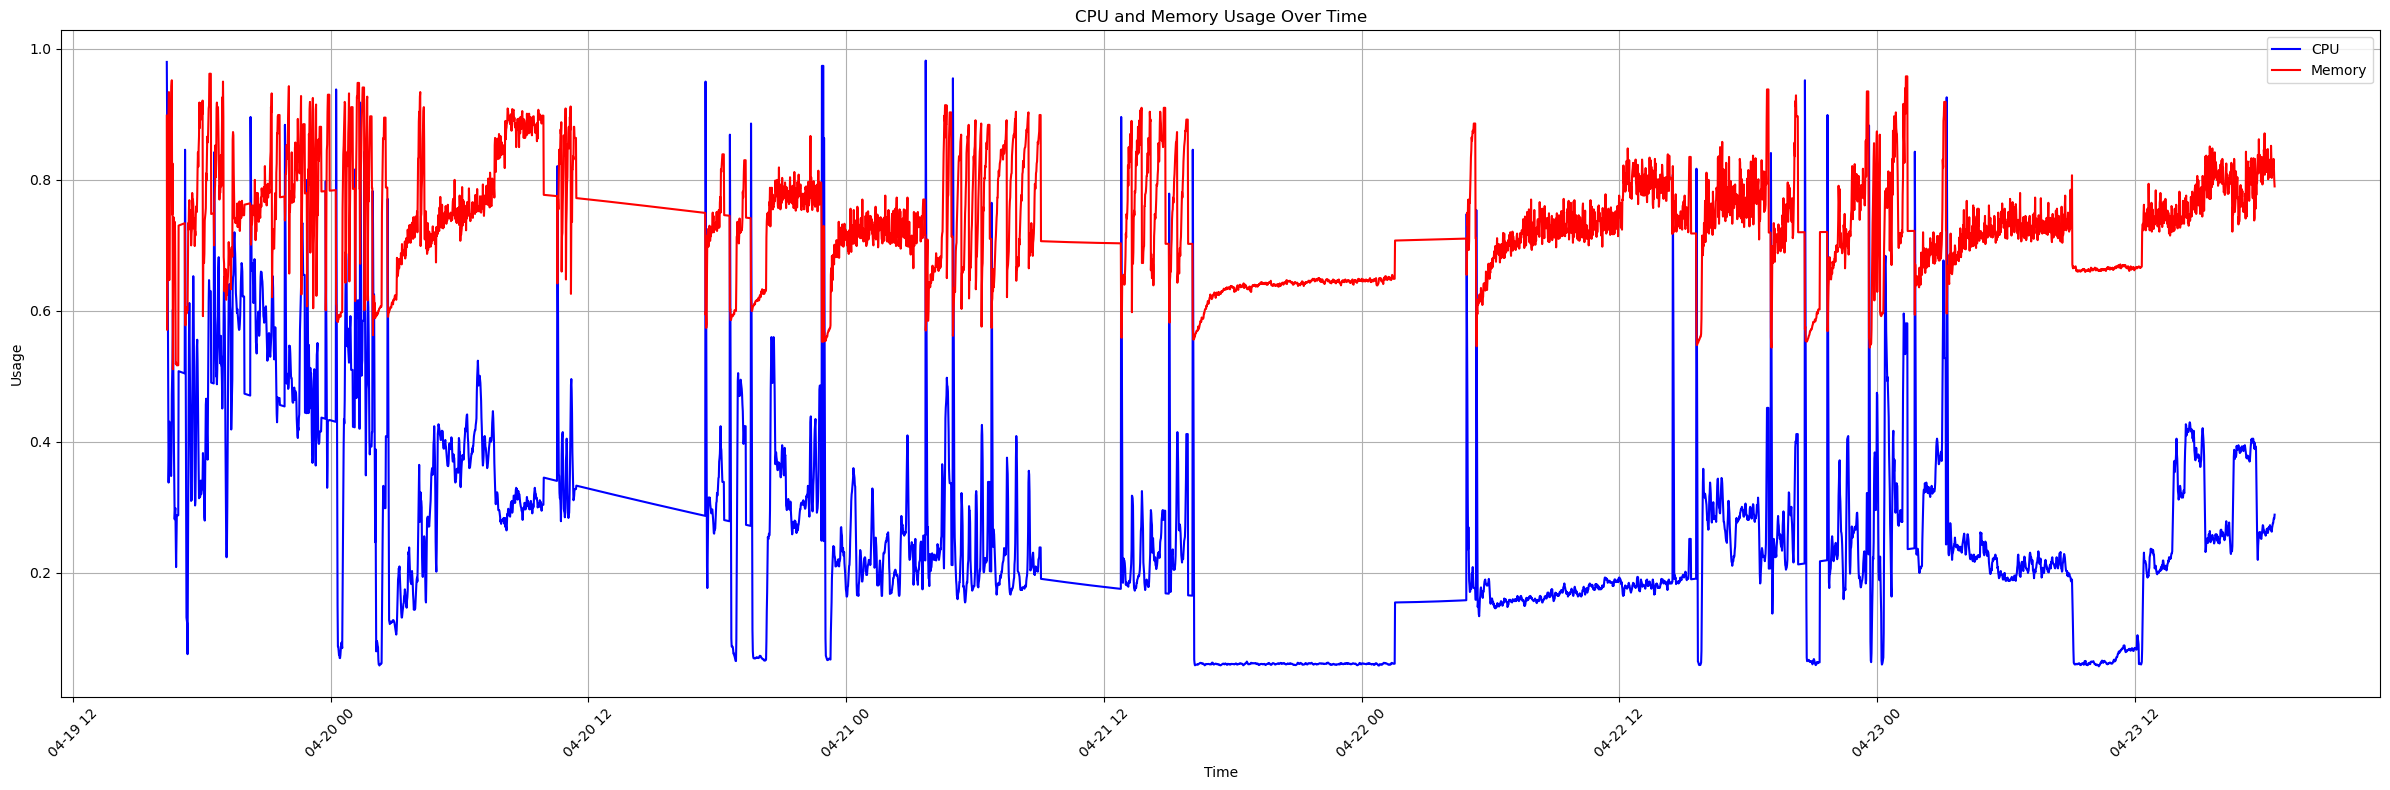

In [103]:
# Plotting
plt.figure(figsize=(24, 8))  # Set the figure size

# Plot CPU
plt.plot(complete_df['Time'], complete_df['CPU'], label='CPU', color='blue')

# Plot Memory
plt.plot(complete_df['Time'], complete_df['Memory'], label='Memory', color='red')

# Format the plot
plt.title('CPU and Memory Usage Over Time')  # Set the title
plt.xlabel('Time')  # Set the x-axis label
plt.ylabel('Usage')  # Set the y-axis label
plt.legend()  # Show legend
plt.grid(True)  # Show grid
plt.xticks(rotation=45)  # Rotate x-axis labels for better readability

# Show plot
plt.tight_layout()  # Adjust layout to prevent clipping of labels
plt.show()

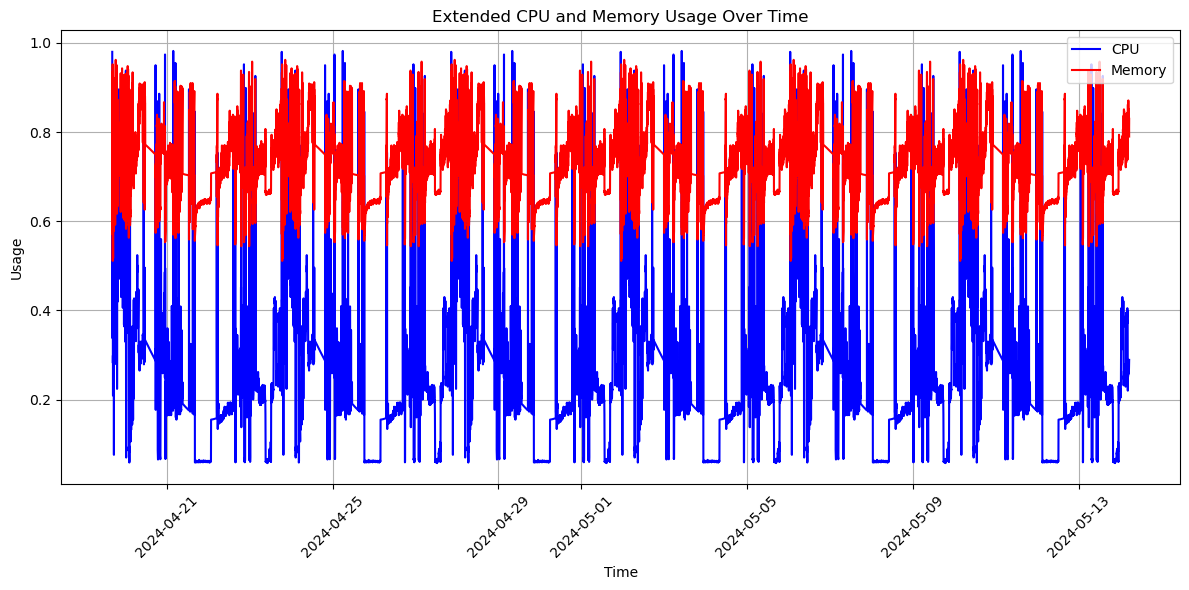

In [112]:
import numpy as np
# Generate new time index extending three times into the future
min_time = complete_df.index.min()
max_time = complete_df.index.max() + pd.Timedelta(minutes=(len(complete_df)) * 5)  # Extend time range by three times
extended_time_index = pd.date_range(min_time, max_time, freq='1Min')

# Replicate the values of CPU and Memory to fill the extended time range
extended_df = pd.DataFrame(index=extended_time_index)
extended_df['CPU'] = np.tile(complete_df['CPU'].values, 6)  # Replicate CPU values four times
extended_df['Memory'] = np.tile(complete_df['Memory'].values, 6)  # Replicate Memory values four times

extended_df['Time'] = extended_df.index

# Plotting
plt.figure(figsize=(12, 6))  # Set the figure size

# Plot CPU
plt.plot(extended_df.index, extended_df['CPU'], label='CPU', color='blue')

# Plot Memory
plt.plot(extended_df.index, extended_df['Memory'], label='Memory', color='red')

# Format the plot
plt.title('Extended CPU and Memory Usage Over Time')  # Set the title
plt.xlabel('Time')  # Set the x-axis label
plt.ylabel('Usage')  # Set the y-axis label
plt.legend()  # Show legend
plt.grid(True)  # Show grid
plt.xticks(rotation=45)  # Rotate x-axis labels for better readability

# Show plot
plt.tight_layout()  # Adjust layout to prevent clipping of labels
plt.show()

In [114]:
extended_df.to_csv("CPU & Memory Data Interpolated.csv")

<h1>Merging Both Datasets Together</h1>

In [194]:
ingress_requests = pd.read_excel('CPU & Memory Data.xlsx', sheet_name='Requests')
ingress_requests['Time'] = pd.to_datetime(ingress_requests['Time'])
ingress_requests.head()

,Time,exported_service,host,instance,method,namespace,path,status,Value,service_method_status
0,2024-04-19 22:06:00,order-management-srv,microservices-bookstore.dev,10.1.10.31:10254,GET,ingress-nginx,/api/orders/.*,200,5,order-management-srv_GET_200
1,2024-04-19 22:07:00,order-management-srv,microservices-bookstore.dev,10.1.10.31:10254,GET,ingress-nginx,/api/orders/.*,200,5,order-management-srv_GET_200
2,2024-04-19 22:08:00,order-management-srv,microservices-bookstore.dev,10.1.10.31:10254,GET,ingress-nginx,/api/orders/.*,200,5,order-management-srv_GET_200
3,2024-04-19 22:09:00,order-management-srv,microservices-bookstore.dev,10.1.10.31:10254,GET,ingress-nginx,/api/orders/.*,200,5,order-management-srv_GET_200
4,2024-04-19 22:10:00,order-management-srv,microservices-bookstore.dev,10.1.10.31:10254,GET,ingress-nginx,/api/orders/.*,200,5,order-management-srv_GET_200


In [190]:
request_data = pd.read_csv("Pivoted Requests Data.csv")
request_data['Time'] = pd.to_datetime(request_data['Time'])
request_data.head()

,Unnamed: 0,order-management-srv_GET_500,order-management-srv_GET_502,order-management-srv_GET_503,order-management-srv_GET_504,order-management-srv_POST_500,order-management-srv_POST_502,order-management-srv_POST_503,order-management-srv_POST_504,order-management-srv_PUT_500,...,review-and-rating-srv_PUT_500,review-and-rating-srv_PUT_502,review-and-rating-srv_PUT_503,review-and-rating-srv_PUT_504,shipping-and-logistics-srv_GET_500,shipping-and-logistics-srv_GET_502,user-account-srv_GET_502,user-account-srv_POST_500,user-account-srv_POST_502,Time
0,2024-04-19 16:20:00,0.0,1.0,0.0,1.0,0.0,1.0,0.0,1.0,0.0,...,0.0,1.0,0.0,0.0,0.0,1.0,1.0,0.0,1.0,2024-04-19 16:20:00
1,2024-04-19 16:21:00,0.0,1.0,0.0,1.0,0.0,1.0,0.0,1.0,0.0,...,0.0,1.0,0.0,1.0,0.0,1.0,1.0,0.0,1.0,2024-04-19 16:21:00
2,2024-04-19 16:22:00,0.0,1.0,0.0,1.0,0.0,1.0,0.0,1.0,0.0,...,0.0,1.0,0.0,1.0,0.0,1.0,1.0,0.0,1.0,2024-04-19 16:22:00
3,2024-04-19 16:23:00,0.0,1.0,0.0,1.0,0.0,1.0,0.0,1.0,0.0,...,0.0,1.0,0.0,1.0,0.0,1.0,1.0,0.0,1.0,2024-04-19 16:23:00
4,2024-04-19 16:24:00,0.0,1.0,0.0,1.0,0.0,1.0,0.0,1.0,0.0,...,0.0,1.0,0.0,1.0,0.0,1.0,1.0,0.0,1.0,2024-04-19 16:24:00


In [191]:
resource_data = pd.read_csv("CPU & Memory Data Interpolated.csv")
resource_data['Time'] = pd.to_datetime(resource_data['Time'])
resource_data.head()

,Time,CPU,Memory
0,2024-04-19 16:22:00,0.980,0.898
1,2024-04-19 16:23:00,0.885,0.571
2,2024-04-19 16:24:00,0.740,0.706
3,2024-04-19 16:25:00,0.609,0.771
4,2024-04-19 16:26:00,0.447,0.809


In [195]:
merged_df = pd.merge(ingress_requests, resource_data, on='Time', how='inner')
if 'Unnamed: 0' in merged_df.columns:
    merged_df.drop(columns=['Unnamed: 0'], inplace=True)
merged_df.head(-1)

,Time,exported_service,host,instance,method,namespace,path,status,Value,service_method_status,CPU,Memory
0,2024-04-19 22:06:00,order-management-srv,microservices-bookstore.dev,10.1.10.31:10254,GET,ingress-nginx,/api/orders/.*,200,5,order-management-srv_GET_200,0.546,0.751
1,2024-04-19 22:06:00,payment-processing-srv,microservices-bookstore.dev,10.1.10.31:10254,GET,ingress-nginx,/api/payments/.*,401,1,payment-processing-srv_GET_401,0.546,0.751
2,2024-04-19 22:06:00,product-catalog-srv,microservices-bookstore.dev,10.1.10.31:10254,GET,ingress-nginx,/api/products/.*,200,9,product-catalog-srv_GET_200,0.546,0.751
3,2024-04-19 22:06:00,review-and-rating-srv,microservices-bookstore.dev,10.1.10.31:10254,POST,ingress-nginx,/api/reviews/.*,401,1,review-and-rating-srv_POST_401,0.546,0.751
4,2024-04-19 22:06:00,user-account-srv,microservices-bookstore.dev,10.1.10.31:10254,POST,ingress-nginx,/api/users/.*,200,3,user-account-srv_POST_200,0.546,0.751
...,...,...,...,...,...,...,...,...,...,...,...,...
102647,2024-04-23 16:57:00,review-and-rating-srv,microservices-bookstore.dev,10.1.12.84:10254,PUT,ingress-nginx,/api/reviews/.*,200,4474,review-and-rating-srv_PUT_200,0.388,0.783
102648,2024-04-23 16:57:00,review-and-rating-srv,microservices-bookstore.dev,10.1.12.84:10254,PUT,ingress-nginx,/api/reviews/.*,500,23,review-and-rating-srv_PUT_500,0.388,0.783
102649,2024-04-23 16:57:00,shipping-and-logistics-srv,microservices-bookstore.dev,10.1.12.84:10254,GET,ingress-nginx,/api/shipping/.*,200,4601,shipping-and-logistics-srv_GET_200,0.388,0.783
102650,2024-04-23 16:57:00,user-account-srv,microservices-bookstore.dev,10.1.12.84:10254,GET,ingress-nginx,/api/users/.*,200,4458,user-account-srv_GET_200,0.388,0.783


In [196]:
merged_df.to_csv("Combined Final Dataset.csv")